In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import optuna
from sklearn.cluster import KMeans
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.shape

(768, 9)

In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
X = df[features]
y = df['Outcome']

In [6]:
train_x, test_x, train_y, test_y = train_test_split(X, y)

In [7]:
train_x.shape

(576, 8)

In [8]:
copy_df = df.copy()

In [9]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
df.isnull() == True

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [11]:
copy_df['Insulin'].mean()

79.79947916666667

#fill missing data with mean value for respective columns

In [12]:
for col in copy_df:
    copy_df[col].fillna(copy_df[col].mean(), inplace = True)
        

In [13]:
copy_df.shape

(768, 9)

In [14]:
copy_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [15]:
copy_df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [16]:
def score(x, y, model):
    score = cross_val_score(model, x, y,cv=5,  scoring="accuracy")
    score = score.mean()
    print(score)
    return score

In [17]:
model = XGBClassifier()

In [18]:
score = score(X, y, model)

0.7409557762498938


In [19]:
score

0.7409557762498938

In [20]:
km = KMeans()

In [21]:
cluster_df = X.copy()

In [22]:
km.fit(cluster_df[['Glucose', 'Insulin',
       'BMI', 'Age']])

/home/tawhid885/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans()

In [23]:
cluster_predict = km.predict(cluster_df[['Glucose', 'Insulin',
       'BMI', 'Age']])

In [24]:
cluster = pd.Series(cluster_predict)

In [48]:
# cluster_df['cluster'].shape

In [28]:
y.shape

(768,)

In [29]:
train_x, test_x, train_y, test_y = train_test_split(X,y)

In [30]:
model.fit(train_x, train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [31]:
prediction =model.predict(test_x)

In [32]:
prediction

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [33]:
confusion_matrix = metrics.confusion_matrix(test_y, prediction)

In [34]:
confusion_matrix

array([[113,  22],
       [ 22,  35]])

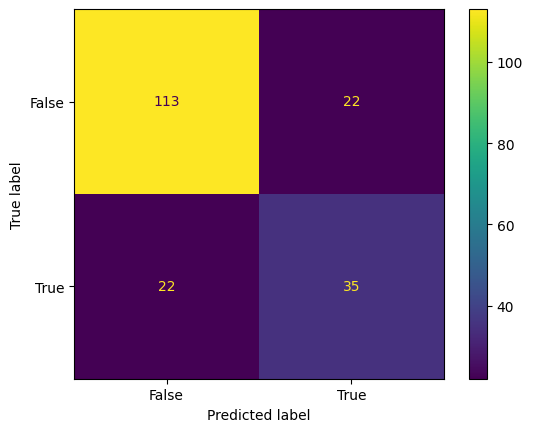

In [35]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels=[False, True])
cm_display.plot()
plt.show()

In [38]:
# score = score(train_x, train_y, model)

In [36]:
test_y

333    0
423    0
372    0
389    0
634    0
      ..
482    0
479    0
453    0
490    0
705    0
Name: Outcome, Length: 192, dtype: int64

In [43]:
res=0
for i in test_y:
    if i == 0:
        res+=1
res

135

In [44]:
res_1=0
for i in prediction:
    if i == 0:
        res_1+=1
res_1

135

## Accuracy score of true negative

In [46]:
confusion_matrix[0][0]/135

0.837037037037037

## Accuracy score of true positive

In [47]:
confusion_matrix[1][1]/57

0.6140350877192983

## ROC and AUC

In [51]:
fpr, tpr, thresholds= roc_curve(test_y, prediction)

Text(0, 0.5, 'True positive rate')

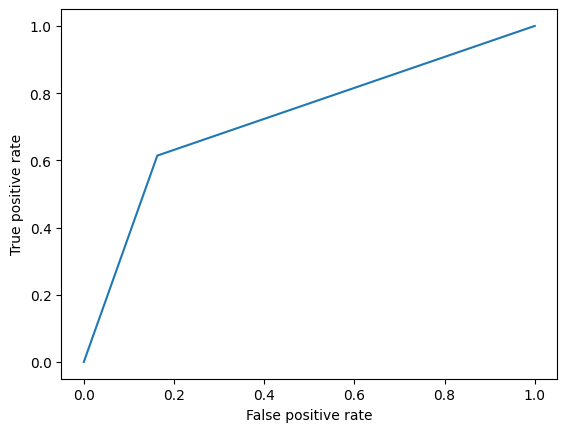

In [52]:
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

In [54]:
roc_auc_score(test_y, prediction)

0.7255360623781677

In [55]:
accuracy_score(test_y, prediction)

0.7708333333333334